<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_in_the_works/blob/main/Surg100test_retinanet_oct4_9am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-10-04 18:27:00--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595 [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]     595  --.-KB/s    in 0s      

2021-10-04 18:27:00 (24.0 MB/s) - ‘install_colab.sh’ saved [595/595]

- Installing mmcv
installing mmcv-full from wheel.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu102/torch1.9.0/index.html
     |████████████████████████████████| 35.6 MB 140 kB/s 
     |████████████████████████████████| 185 kB 15.0 MB/s 
- Installing mmdet
installing mmdet from https://github.com/open-mmlab/mmdetection.git.
Cloning into '/tmp/tmpiom0ci5g/mmdetection'...
remote: Enumerating objects: 21

In [ ]:
exit()

In [ ]:
import icevision

In [ ]:
from icevision.all import *
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.10.0a1
torch v 1.9.0+cu102
torchvision v 0.10.0+cu102


In [ ]:
!git clone https://github.com/yrodriguezmd/Surgical_instruments.git

fatal: destination path 'Surgical_instruments' already exists and is not an empty directory.


In [ ]:
!ls Surgical_instruments/project/Surg100/Surg_100_ann_coco

README	README.dataset.txt  README.roboflow.txt  train


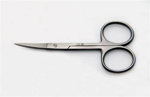

In [ ]:
image_path = Path('Surgical_instruments/project/Surg100/Surg_100_ann_coco/train')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[0])
img = img.convert('RGB')

img.to_thumb(150,150)

In [ ]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)

81

In [ ]:
from icevision.models.checkpoint import *

In [ ]:
model_type = models.mmdet.retinanet
backbone = model_type.backbones.resnet50_fpn_1x

model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map),)# **extra_args) 

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2021-10-04 20:50:38,352 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2021-10-04 20:50:38,354 - mmcv - INFO - load model from: torchvision://resnet50
2021-10-04 20:50:38,355 - mmcv - INFO - Use load_from_torchvision loader
2021-10-04 20:50:38,704 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2021-10-04 20:50:38,734 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2021-10-04 20:50:38,791 - mmcv - INFO - initialize RetinaHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'retina_cls',

Use load_from_local loader


In [ ]:
backbone.__dict__


{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.16.0/configs/retinanet/retinanet_r50_fpn_1x_coco.py'),
 'model_name': 'retinanet',
 'pretrained': True,
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth'}

Generate inference using pretrained model

In [ ]:
model.eval()

imgs_array = [PIL.Image.open(file) for file in img_files]

imgs_array = [image.convert('RGB') for image in imgs_array]

img_size = 384 

valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)

In [ ]:
# generating 1st pseudolabels
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl,
                                          keep_images=True,) 

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


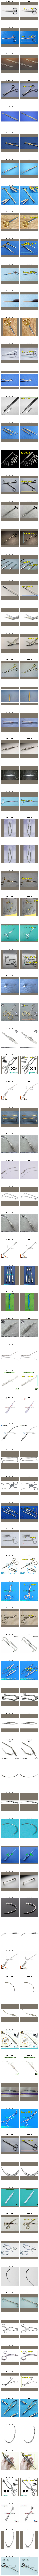

In [ ]:
show_preds(preds_saved, font_size=30, label_color='#ffff00')

In [ ]:
#skip
for pred in preds_saved:
  pred.add_component(FilepathRecordComponent())

for _ in range(len(preds_saved)): 
  preds_saved[_].set_filepath(img_files[_]) 

conv = convert_preds_to_coco_style(preds_saved) 

In [ ]:
#skip
add_info = {
    "info": {
    "description": "Surgery Instruments",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2021,
    "contributor": "MR",
    "date_created": "2021/09/27"
    },
  "categories": [
                 ## adjusted to 80 classes, 
                 ## limiting categories
    {
      "supercategory": "kitchen",
      "id": 44,
      "name": "knife"
    },
    {
      "supercategory": "indoor",
      "id": 77,
      "name": "scissors"
    }
    ] }

In [ ]:
#skip
annot = {**add_info, **conv}

f = open('annot.json','w') 
f.write(str(annot)) 
f.close()
#### cannot see files in Colab

### alternate: go straight to Roboflow and google mount
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
root_dir = Path('/content/gdrive/MyDrive')

Mounted at /content/gdrive


In [ ]:
!ls Surgical_instruments/project/Surg100

_annotations.csv  notebooks  raw_images  Surg_100_ann_coco  Surg100_annot


In [ ]:
import pandas as pd
df = pd.read_csv('./Surgical_instruments/project/Surg100/_annotations.csv')
df.rename(columns = {'class':'label'},inplace=True)
classes = df.label.unique().tolist()
len(classes)
#classes = ['scissors','knife']

15

Using annotations from Roboflow, with 8 supercategories manually revised (_annotations_.coco.json)

In [ ]:
from icevision.models.checkpoint import *

In [ ]:
!ls Surgical_instruments/project/Surg100/Surg_100_ann_coco/train

In [ ]:
parser = parsers.COCOBBoxParser(
    # using 8 supercats
    ### temporary gdrive
    #annotations_filepath = Path('./gdrive/MyDrive/train/_annotations.coco.json'), ##
    annotations_filepath = Path('/content/Surgical_instruments/project/Surg100/Surg_100_ann_coco/train/_annotations_.coco.json'), ##

    img_dir = Path('./Surgical_instruments/project/Surg100/Surg_100_ann_coco/train', ## . important
    mask =False)
)

In [ ]:
train_records, valid_records = parser.parse()

  0%|          | 0/130 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/98 [00:00<?, ?it/s]

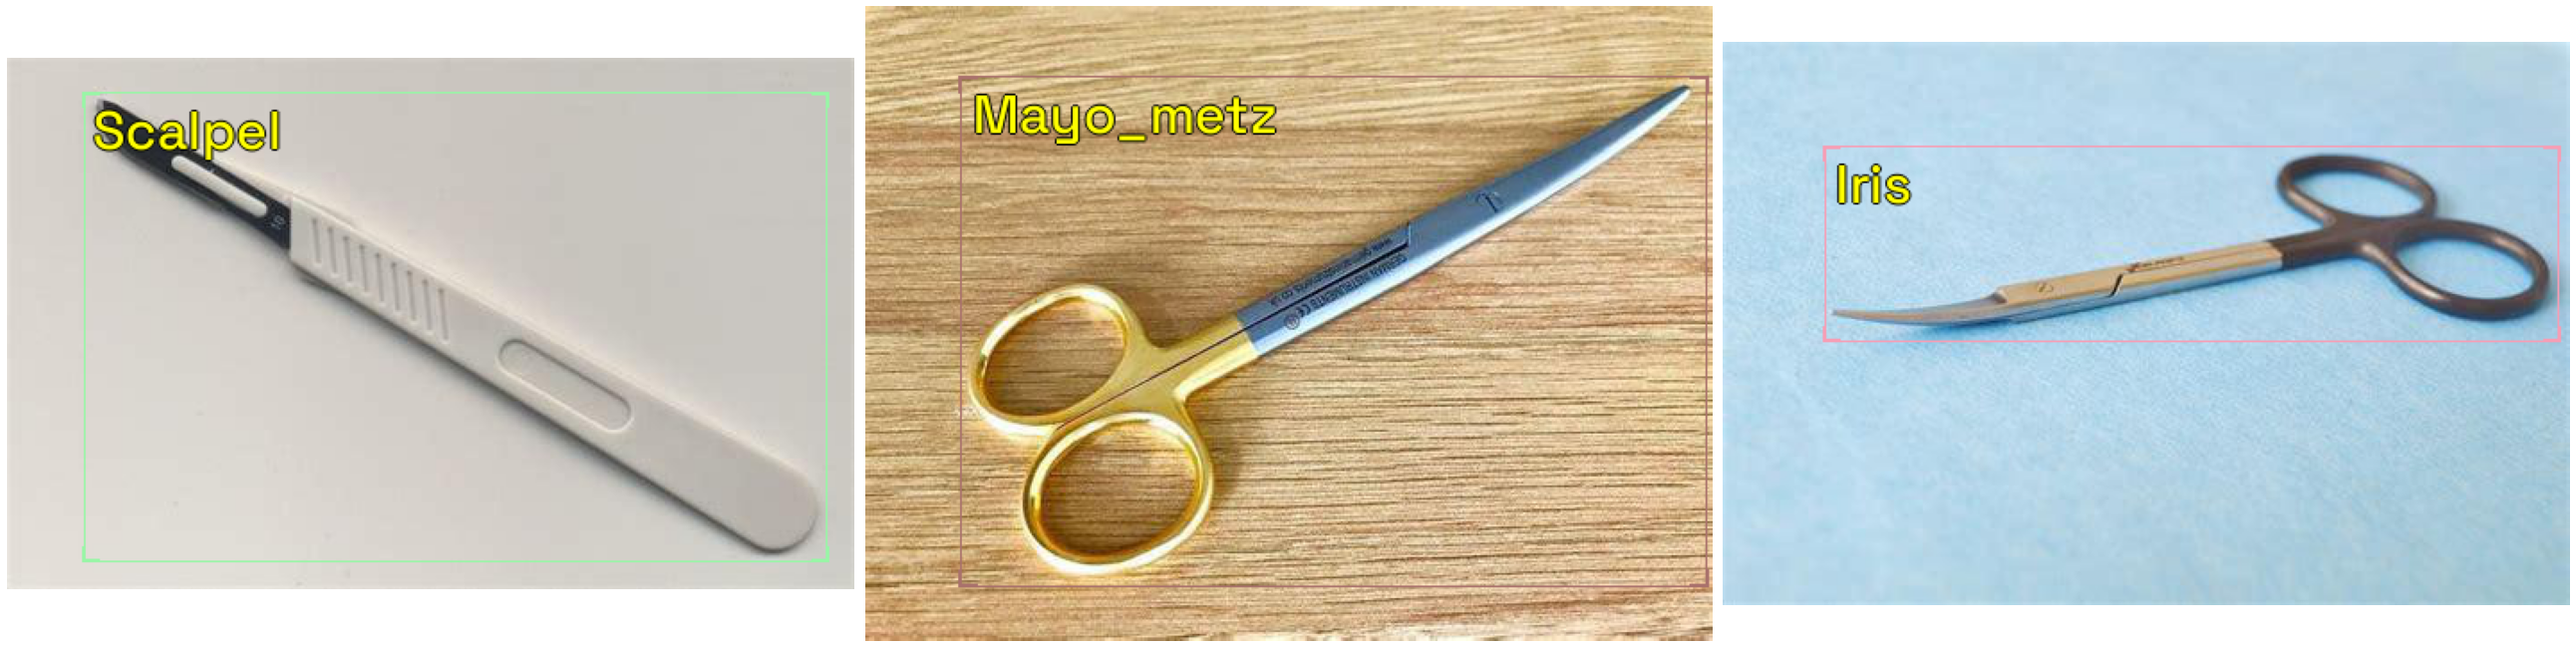

In [ ]:
# refined pseudolabels 1
show_records(train_records[:3], ncols=3, font_size=30, label_color = '#ffff00')

In [ ]:
presize = 512
image_size = 384

train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=image_size), tfms.A.Normalize()])

In [ ]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

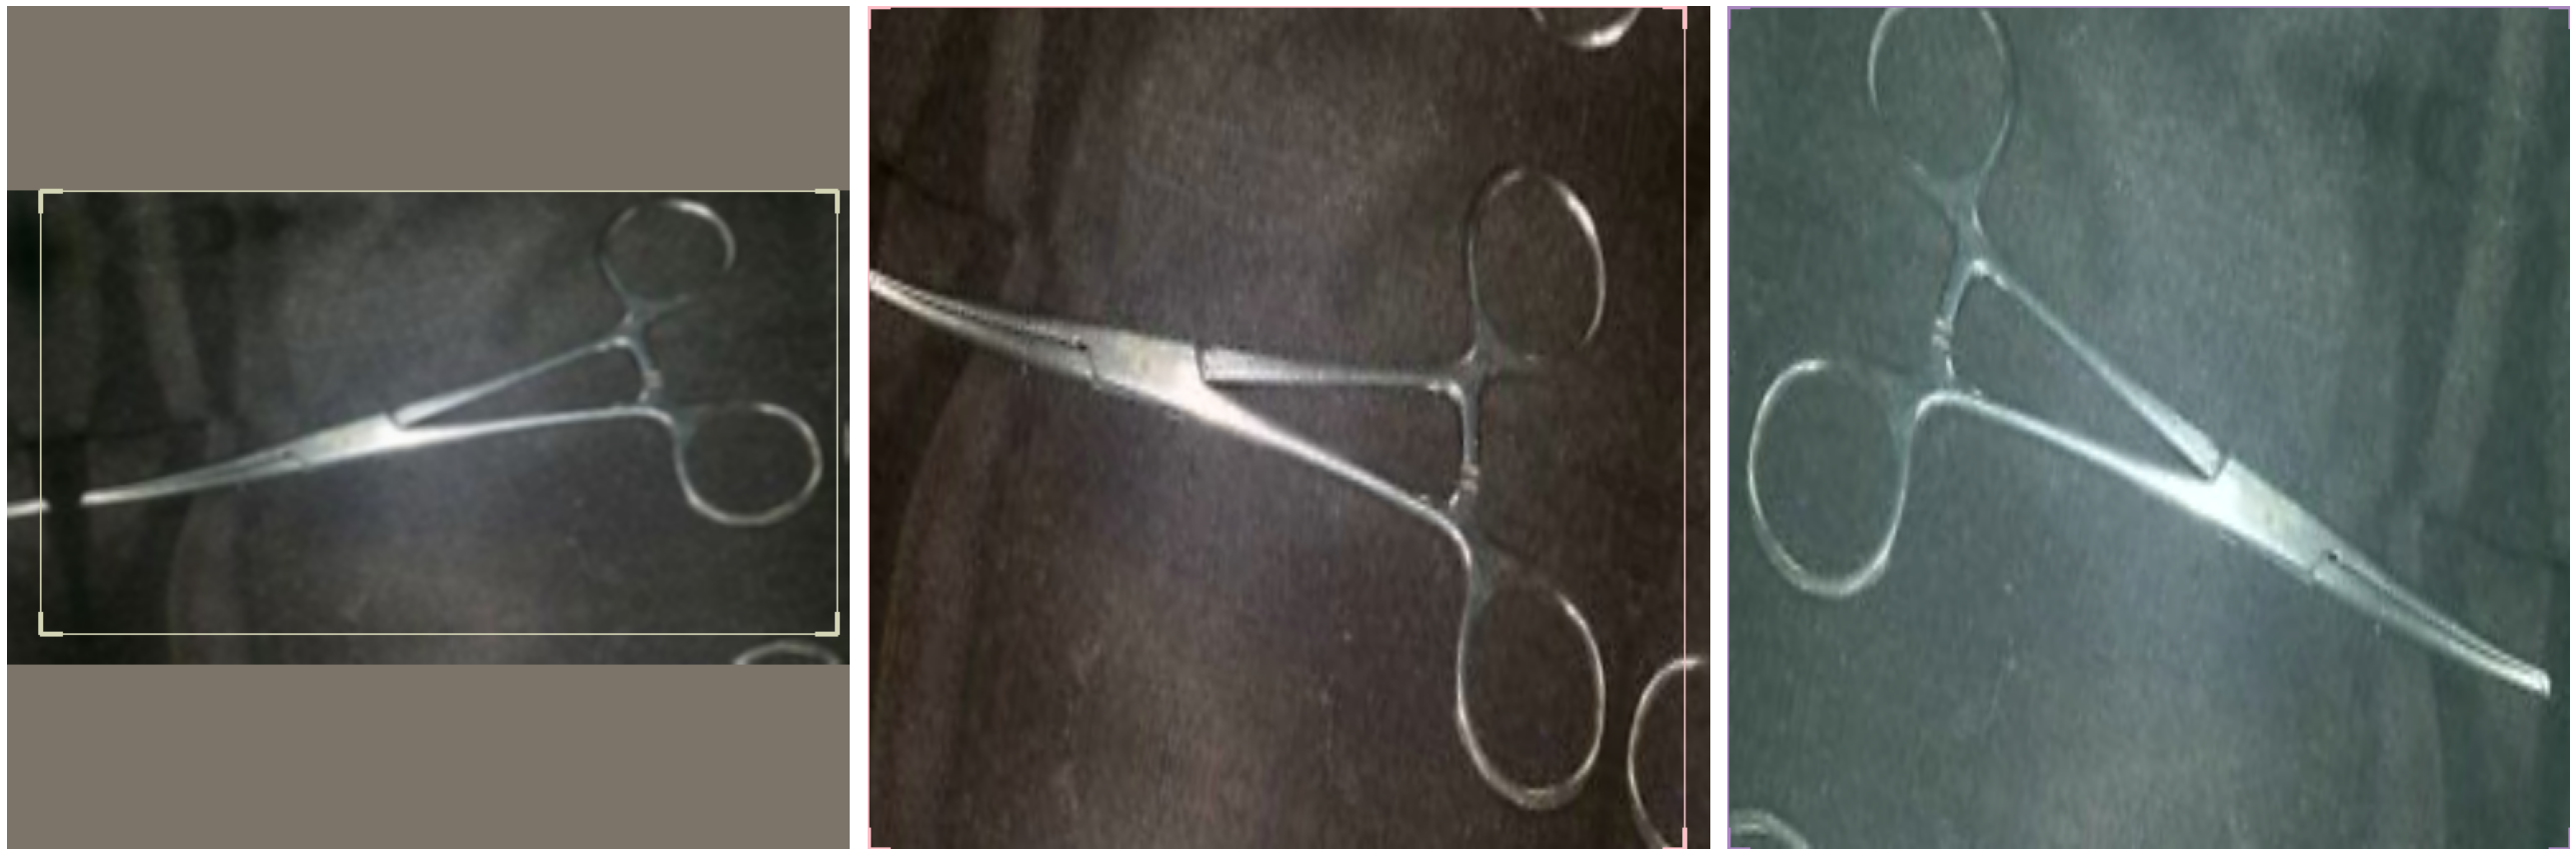

In [ ]:
samples = [train_ds[6] for _ in range(3)]
show_samples(samples, ncols=3, display_label=False)

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

model_type = models.mmdet.retinanet ##
backbone = model_type.backbones.resnet50_fpn_1x ##

model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(classes),)# **extra_args) 

In [ ]:
train_dl = model_type.train_dl(train_ds, batch_size = 16, num_workers = 4,
                               shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=16, num_workers = 4,
                               shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
learn = model_type.fastai.learner(dls = [train_dl, valid_dl],
                                  model = model, metrics = metrics)

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(20, 1e-4)

In [ ]:
## problem with very small data

In [ ]:
#model_type.show_results(model, valid_ds) 

In [ ]:
checkpoint_path = 'Surg100_ret_b.pth'

save_icevision_checkpoint(model, 
                        model_name='mmdet.retinanet', 
                        backbone_name='resnet50_fpn_1x',
                        classes =  parser.class_map.get_classes(), 
                        img_size=image_size, 
                        filename=checkpoint_path,
                        meta={'icevision_version': '0.9.1'})

In [ ]:
!ls # with Surg100_ret_b.pth

annot.json   http:	       pilot15_for_pseudolabel	Surg100_ret_b.pth
checkpoints  install_colab.sh  pilot15_ret.pth		Surg100_ret.pth
gdrive	     models	       sample_data		Surgical_instruments


In [ ]:
checkpoint_and_model = model_from_checkpoint(checkpoint_path)

In [ ]:
# using finetune
model = checkpoint_and_model['model']
model

In [ ]:
!ls gdrive/MyDrive/pilot15_test

File00016.jpg  File00019.jpg  File00022.jpg  File00025.jpg  File00028.jpg
File00017.jpg  File00020.jpg  File00023.jpg  File00026.jpg  File00029.jpg
File00018.jpg  File00021.jpg  File00024.jpg  File00027.jpg  File00030.jpg


Test fine tuned on pilot15

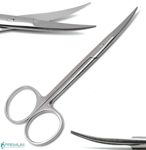

In [ ]:
test_images = Path('./gdrive/MyDrive/pilot15_test/')

img_files_test = get_image_files(test_images)

img = PIL.Image.open(img_files_test[0])
#img = img.convert('RGB')

img.to_thumb(150,150)

In [ ]:
imgs_array = [PIL.Image.open(Path(file)) for file in img_files_test]
imgs_array = [image.convert('RGB') for image in imgs_array]

# same transforms

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map=class_map)

infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

In [ ]:
# using finetuned model
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [ ]:
#using finetuned
#show_preds(preds_saved, font_size=30, label_color='#ffff00')
show_preds(preds, font_size=30, label_color='#ffff00')
# shows but really poor prediction

In [ ]:
## no predictions, but processed

Test fine tuned on Surg200

In [ ]:
!ls Surgical_instruments/project/Surg200

In [ ]:
images_200 = Path('Surgical_instruments/project/Surg200/')

img_files_200 = get_image_files(images_200)

img = PIL.Image.open(img_files_200[0])
#img = img.convert('RGB')

img.to_thumb(150,150)

In [ ]:
imgs_array = [PIL.Image.open(Path(file)) for file in img_files_200]
imgs_array = [image.convert('RGB') for image in imgs_array]

# same transforms

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map=class_map)

infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

In [ ]:
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [ ]:
show_preds(preds, font_size=30, label_color='#ffff00')

Try fine tuning and saving with callback

In [ ]:
model_type = models.mmdet.retinanet ##
backbone = model_type.backbones.resnet50_fpn_1x ##

model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(classes),)# **extra_args) 
learn = model_type.fastai.learner(dls = [train_dl, valid_dl],
                                  model = model, metrics = metrics)

from fastai.callback.tracker import SaveModelCallback
fname='Surg100_retinanet-3'

learn.fine_tune(20, 1e-4, cbs=SaveModelCallback(monitor='COCOMetric', fname=fname))

Using save model callback, get inference on pilot15_test

In [150]:
test_images = Path('./gdrive/MyDrive/pilot15_test/')

img_files_test = get_image_files(test_images)

img = PIL.Image.open(img_files_test[0])
#img = img.convert('RGB')

#img.to_thumb(150,150)

In [151]:
imgs_array = [PIL.Image.open(Path(file)) for file in img_files_test]
imgs_array = [image.convert('RGB') for image in imgs_array]

# same transforms

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map=class_map)

infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

In [154]:
!ls models

Surg100_retinanet-3.pth


In [156]:
model = torch.load('models/Surg100_retinanet-3.pth')

In [157]:
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)


  0%|          | 0/4 [00:00<?, ?it/s]

AttributeError: ignored